In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fdm import fdm
import scipy
from helper import get_df_all, download
from pathlib import Path
import emd
from sklearn.model_selection import train_test_split

import requests
from tqdm.auto import tqdm

In [27]:
working_dir = Path('.')
DATA_PATH = Path("./Data")
save_model_path = working_dir / 'Model'
DE_path = DATA_PATH / '12k_DE'
FE_path = DATA_PATH / '12k_FE'


for path in [DATA_PATH, save_model_path]:
    if not path.exists():
        path.mkdir(parents=True)

In [28]:
data = get_df_all(FE_path, segment_length=200)

In [29]:
data

,label,filename,0,1,2,3,4,5,6,7,...,190,191,192,193,194,195,196,197,198,199
0,1,B007_0.mat,-0.168120,0.181278,0.044345,-0.270454,-0.138070,0.082030,0.041421,-0.117928,...,-0.059776,-0.004386,0.095187,-0.004711,-0.123938,0.006497,0.191186,-0.035248,-0.120689,0.228871
1,1,B007_0.mat,0.172506,-0.062213,-0.029563,0.070822,-0.112080,-0.237318,-0.013157,0.118090,...,-0.195409,-0.028426,0.269967,0.041583,-0.258272,0.019330,0.143430,-0.117765,-0.074233,0.233419
2,1,B007_0.mat,0.104771,-0.161623,0.148628,0.261683,-0.236830,-0.258109,0.138882,0.040284,...,-0.130435,-0.027939,0.109156,0.036385,-0.117928,0.027939,0.060263,-0.103146,-0.047593,0.101847
3,1,B007_0.mat,0.060751,-0.060751,0.091776,0.215714,-0.013969,-0.129786,0.171856,0.115491,...,-0.097786,0.084141,0.099410,-0.032325,-0.040121,0.039147,-0.039472,-0.095674,0.027776,0.064162
4,1,B007_0.mat,-0.045644,-0.055066,0.116791,0.060588,-0.063025,0.009746,0.018680,-0.041583,...,-0.012508,0.057340,0.059614,-0.044507,0.021766,0.082517,-0.013482,-0.112405,-0.025177,0.081705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35746,3,OR021@6_0.mat,0.022335,-0.436950,0.244871,0.425986,-0.470656,-0.554716,0.556340,0.721618,...,0.190861,-0.070659,-0.010964,0.247714,0.128324,-0.159999,0.003655,0.264769,-0.030863,-0.237155
35747,3,OR021@6_0.mat,0.029238,0.082842,-0.172181,0.077563,0.358169,0.012589,-0.271673,0.033705,...,0.073908,-0.575020,0.373601,0.531569,-0.229846,-0.182333,0.309033,0.039391,-0.669639,-0.225785
35748,3,OR021@6_0.mat,0.574614,0.245277,-0.195328,0.358576,0.583142,0.065786,-0.129136,0.329337,...,0.088527,-0.071471,-0.131979,0.016650,0.050355,-0.038984,0.094618,0.193298,-0.033705,-0.162841
35749,3,OR021@6_0.mat,-0.048731,-0.147816,-0.200201,-0.137258,-0.103958,-0.043451,0.171369,0.206293,...,0.412585,-0.512483,-0.489742,0.559589,0.348423,-0.507204,0.085685,0.720806,-0.000812,-0.423550


In [30]:
features = data.T[2:]

In [31]:
features

,0,1,2,3,4,5,6,7,8,9,...,35741,35742,35743,35744,35745,35746,35747,35748,35749,35750
0,-0.16812,0.172506,0.104771,0.060751,-0.045644,-0.056852,0.178679,0.034111,-0.111268,0.175592,...,-0.19614,0.213602,-0.051167,-0.809333,-0.073502,0.022335,0.029238,0.574614,-0.048731,0.325682
1,0.181278,-0.062213,-0.161623,-0.060751,-0.055066,-0.134496,-0.102009,0.077319,0.059126,0.003574,...,0.103146,0.490554,0.097461,-0.445478,0.004873,-0.43695,0.082842,0.245277,-0.147816,0.326495
2,0.044345,-0.029563,0.148628,0.091776,0.116791,0.044832,-0.097948,-0.041096,0.070497,-0.046619,...,-0.047512,-0.191267,-0.086497,0.511671,-0.127512,0.244871,-0.172181,-0.195328,-0.200201,-0.680603
3,-0.270454,0.070822,0.261683,0.215714,0.060588,0.046456,0.252099,0.023066,-0.008122,0.151877,...,-0.066192,-0.728115,-0.105989,0.524665,-0.221724,0.425986,0.077563,0.358576,-0.137258,-0.5003
4,-0.13807,-0.11208,-0.23683,-0.013969,-0.063025,-0.150577,-0.047106,0.075695,0.048731,0.096811,...,0.196547,-0.127918,0.174212,-0.17543,0.008934,-0.470656,0.358169,0.583142,-0.103958,0.440199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.006497,0.01933,0.027939,0.039147,0.082517,-0.135308,-0.082192,-0.067573,-0.076994,0.107857,...,-0.529945,0.096243,0.555528,0.027614,0.659081,-0.159999,-0.182333,-0.038984,-0.507204,-0.109644
196,0.191186,0.14343,0.060263,-0.039472,-0.013482,0.130923,-0.043533,-0.140506,0.141643,0.002924,...,-0.050761,-0.065786,-0.283855,0.051167,0.412585,0.003655,0.309033,0.094618,0.085685,0.038172
197,-0.035248,-0.117765,-0.103146,-0.095674,-0.112405,-0.008284,0.067735,0.074883,0.119877,-0.134984,...,0.712684,0.033299,-0.77847,0.164059,-0.555934,0.264769,0.039391,0.193298,0.720806,0.025584
198,-0.120689,-0.074233,-0.047593,0.027776,-0.025177,-0.215551,0.010396,0.051654,-0.115491,0.01998,...,0.251774,0.090558,-0.099898,0.167308,0.062131,-0.030863,-0.669639,-0.033705,-0.000812,0.050355


In [32]:
features = features.T
features = np.asarray(features)

In [33]:
features

array([[-0.16812035928143715, 0.18127760479041916, 0.04434479041916167,
        ..., -0.03524842315369261, -0.12068930139720559,
        0.22887109780439122],
       [0.17250610778443112, -0.06221265469061876, -0.02956319361277445,
        ..., -0.11776546906187624, -0.07423285429141717,
        0.23341928143712576],
       [0.10477065868263473, -0.16162295409181637, 0.14862814371257485,
        ..., -0.10314630738522955, -0.04759349301397205,
        0.1018468263473054],
       ...,
       [0.5746142714570858, 0.24527704590818364, -0.19532824351297406,
        ..., 0.19329780439121758, -0.033705289421157685,
        -0.16284121756487027],
       [-0.04873053892215569, -0.14781596806387226, -0.2002012974051896,
        ..., 0.720805888223553, -0.0008121756487025948,
        -0.4235496007984032],
       [0.32568243512974054, 0.3264946107784431, -0.6806031936127744,
        ..., 0.025583532934131736, 0.05035489021956088,
        0.17096297405189623]], dtype=object)

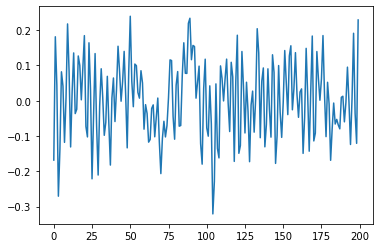

In [34]:
plt.plot(features[0])

In [35]:
fs = 12000
def create_fibfs(samples):
    fibfs = []
    for i in range(0,len(samples),1):
        sample = samples[i]
        sample=np.reshape(sample,(len(sample),1))
        fibfs.append(fdm(sample,fs=12000,fc=np.array([375,750,1500,3000,6000]),filter_type='dct',plot_subbands=False))
    return np.array(fibfs)

In [36]:
labels = data['label']
labels = np.asarray(labels)
labels

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

In [37]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [38]:
labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [39]:
idx = np.random.permutation(len(features))
features , labels = features[idx], labels[idx]

In [40]:
fibfs = create_fibfs(features)

In [41]:
test_fibfs = fibfs[-9000:]
fibfs = fibfs[0:-9000]
test_labels = labels[-9000:]
labels = labels[:-9000]

In [42]:
np.shape(fibfs)

(26751, 200, 5)

In [43]:
def get_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1,len(acc)+1)
    
    plt.plot(epochs,acc,'bo',label = 'Training acc')
    plt.plot(epochs,val_acc,'b',label = 'Validation acc')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs,loss,'bo',label='Training Loss')
    plt.plot(epochs,val_loss,'b',label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.figure()

In [46]:
from keras import layers,models

def get_model():
    input_seq = layers.Input(shape = (200,5))
    conv1 = layers.Conv1D(24,7,padding="same", activation="tanh")(input_seq)
    pool1 = layers.MaxPooling1D(5)(conv1)
    conv2 = layers.Conv1D(24,9,padding="same", activation="tanh")(pool1)
    processed = layers.GlobalMaxPooling1D()(conv2)
    compressed = layers.Dense(50, activation="relu")(processed)
    compressed = layers.Dropout(0.3)(compressed)
    out = layers.Dense(4, activation='softmax')(compressed)
    model = models.Model(inputs=input_seq, outputs=out)
    model.compile(optimizer = 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

Epoch 1/50
669/669 [==============================] - 6s 8ms/step - loss: 0.6493 - accuracy: 0.7255 - val_loss: 0.3730 - val_accuracy: 0.8544
Epoch 2/50
669/669 [==============================] - 5s 7ms/step - loss: 0.3591 - accuracy: 0.8565 - val_loss: 0.2812 - val_accuracy: 0.8918
Epoch 3/50
669/669 [==============================] - 5s 7ms/step - loss: 0.2858 - accuracy: 0.8885 - val_loss: 0.2287 - val_accuracy: 0.9146
Epoch 4/50
669/669 [==============================] - 6s 8ms/step - loss: 0.2448 - accuracy: 0.9069 - val_loss: 0.2017 - val_accuracy: 0.9267
Epoch 5/50
669/669 [==============================] - 5s 8ms/step - loss: 0.2057 - accuracy: 0.9220 - val_loss: 0.1685 - val_accuracy: 0.9380
Epoch 6/50
669/669 [==============================] - 5s 7ms/step - loss: 0.1765 - accuracy: 0.9363 - val_loss: 0.1451 - val_accuracy: 0.9471
Epoch 7/50
669/669 [==============================] - 5s 8ms/step - loss: 0.1523 - accuracy: 0.9446 - val_loss: 0.1341 - val_accuracy: 0.9514
Epoch 

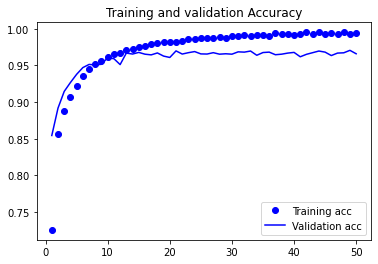

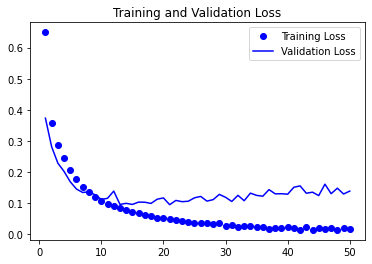

<Figure size 432x288 with 0 Axes>

In [47]:
temp_model = get_model()
history = temp_model.fit(fibfs,labels,epochs=50,validation_split=0.2)
get_curves(history)

In [48]:
k = 12
num_val_samples = len(fibfs)//k
validation_scores = []
model = None
for fold in range(k):
    val_data = fibfs[num_val_samples*fold:num_val_samples*(fold+1)]
    val_label = labels[num_val_samples*fold:num_val_samples*(fold+1)]
    train_data = np.concatenate((fibfs[:num_val_samples*fold],fibfs[num_val_samples*(fold+1):]))
    train_label = np.concatenate((labels[:num_val_samples*fold],labels[num_val_samples*(fold+1):]))
    model = get_model()
    model.fit(train_data,train_label,epochs=30)
    val_score = model.evaluate(val_data,val_label)
    validation_scores.append(val_score)

Epoch 1/30
767/767 [==============================] - 4s 4ms/step - loss: 0.6400 - accuracy: 0.7278
Epoch 2/30
767/767 [==============================] - 3s 4ms/step - loss: 0.3582 - accuracy: 0.8579
Epoch 3/30
767/767 [==============================] - 3s 4ms/step - loss: 0.2569 - accuracy: 0.9050
Epoch 4/30
767/767 [==============================] - 3s 4ms/step - loss: 0.2112 - accuracy: 0.9211
Epoch 5/30
767/767 [==============================] - 3s 4ms/step - loss: 0.1738 - accuracy: 0.9357
Epoch 6/30
767/767 [==============================] - 3s 4ms/step - loss: 0.1469 - accuracy: 0.9465
Epoch 7/30
767/767 [==============================] - 3s 4ms/step - loss: 0.1325 - accuracy: 0.9518
Epoch 8/30
767/767 [==============================] - 6s 8ms/step - loss: 0.1220 - accuracy: 0.9570
Epoch 9/30
767/767 [==============================] - 7s 9ms/step - loss: 0.1032 - accuracy: 0.9646
Epoch 10/30
767/767 [==============================] - 8s 10ms/step - loss: 0.0969 - accuracy: 0.964

767/767 [==============================] - 6s 8ms/step - loss: 0.0565 - accuracy: 0.9803
Epoch 21/30
767/767 [==============================] - 7s 9ms/step - loss: 0.0509 - accuracy: 0.9823
Epoch 22/30
767/767 [==============================] - 6s 8ms/step - loss: 0.0507 - accuracy: 0.9819
Epoch 23/30
767/767 [==============================] - 6s 8ms/step - loss: 0.0415 - accuracy: 0.9854
Epoch 24/30
767/767 [==============================] - 6s 8ms/step - loss: 0.0406 - accuracy: 0.9853
Epoch 25/30
767/767 [==============================] - 6s 8ms/step - loss: 0.0391 - accuracy: 0.9865
Epoch 26/30
767/767 [==============================] - 6s 8ms/step - loss: 0.0369 - accuracy: 0.9876
Epoch 27/30
767/767 [==============================] - 6s 8ms/step - loss: 0.0375 - accuracy: 0.9873
Epoch 28/30
767/767 [==============================] - 5s 7ms/step - loss: 0.0310 - accuracy: 0.9888
Epoch 29/30
767/767 [==============================] - 7s 8ms/step - loss: 0.0351 - accuracy: 0.9872
Ep

767/767 [==============================] - 9s 12ms/step - loss: 0.1293 - accuracy: 0.9545
Epoch 9/30
767/767 [==============================] - 7s 9ms/step - loss: 0.1188 - accuracy: 0.9575
Epoch 10/30
767/767 [==============================] - 5s 7ms/step - loss: 0.1096 - accuracy: 0.9602
Epoch 11/30
767/767 [==============================] - 7s 9ms/step - loss: 0.1017 - accuracy: 0.9624
Epoch 12/30
767/767 [==============================] - 7s 9ms/step - loss: 0.0936 - accuracy: 0.9666
Epoch 13/30
767/767 [==============================] - 7s 9ms/step - loss: 0.0846 - accuracy: 0.9705
Epoch 14/30
767/767 [==============================] - 7s 9ms/step - loss: 0.0832 - accuracy: 0.9702
Epoch 15/30
767/767 [==============================] - 7s 9ms/step - loss: 0.0738 - accuracy: 0.9734
Epoch 16/30
767/767 [==============================] - 7s 9ms/step - loss: 0.0718 - accuracy: 0.9735
Epoch 17/30
767/767 [==============================] - 7s 9ms/step - loss: 0.0681 - accuracy: 0.9755
Ep

767/767 [==============================] - 3s 4ms/step - loss: 0.0335 - accuracy: 0.9876
Epoch 28/30
767/767 [==============================] - 4s 5ms/step - loss: 0.0312 - accuracy: 0.9889
Epoch 29/30
767/767 [==============================] - 4s 5ms/step - loss: 0.0323 - accuracy: 0.9883
Epoch 30/30
70/70 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9717
Epoch 1/30
767/767 [==============================] - 4s 4ms/step - loss: 0.6348 - accuracy: 0.7256
Epoch 2/30
767/767 [==============================] - 3s 4ms/step - loss: 0.3507 - accuracy: 0.8618
Epoch 3/30
767/767 [==============================] - 4s 5ms/step - loss: 0.2821 - accuracy: 0.8939
Epoch 4/30
767/767 [==============================] - 3s 4ms/step - loss: 0.2289 - accuracy: 0.9148
Epoch 5/30
767/767 [==============================] - 5s 7ms/step - loss: 0.1895 - accuracy: 0.9299
Epoch 6/30
767/767 [==============================] - 5s 6ms/step - loss: 0.1566 - accuracy: 0.9421
Epoch 7/30

767/767 [==============================] - 3s 4ms/step - loss: 0.0740 - accuracy: 0.9746
Epoch 16/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0713 - accuracy: 0.9761
Epoch 17/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0672 - accuracy: 0.9770
Epoch 18/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0619 - accuracy: 0.9790
Epoch 19/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0630 - accuracy: 0.9786
Epoch 20/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0571 - accuracy: 0.9804
Epoch 21/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0535 - accuracy: 0.9821
Epoch 22/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0515 - accuracy: 0.9820
Epoch 23/30
767/767 [==============================] - 4s 5ms/step - loss: 0.0489 - accuracy: 0.9825
Epoch 24/30
767/767 [==============================] - 3s 4ms/step - loss: 0.0466 - accuracy: 0.9837
Ep

In [49]:
validation_scores

[[0.12345102429389954, 0.9668012857437134],
 [0.12615177035331726, 0.964109480381012],
 [0.09287898242473602, 0.9730821251869202],
 [0.13152891397476196, 0.9650067090988159],
 [0.1027829572558403, 0.9703903198242188],
 [0.14754034578800201, 0.9537909626960754],
 [0.1360548436641693, 0.9614176750183105],
 [0.1026092916727066, 0.9717361927032471],
 [0.09764599055051804, 0.9730821251869202],
 [0.15733274817466736, 0.9605203866958618],
 [0.10227788984775543, 0.9717361927032471],
 [0.11090653389692307, 0.966352641582489]]

In [50]:
validation_scores = np.array(validation_scores)
sum(validation_scores)/len(validation_scores)

array([0.11926344, 0.96650217])

In [53]:
y_pred = temp_model.predict(test_fibfs)

282/282 [==============================] - 1s 2ms/step


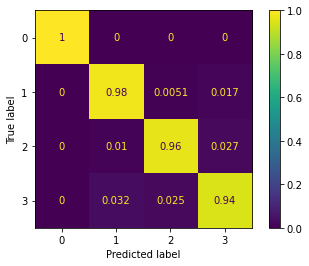

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(np.argmax(y_pred, axis=-1),np.argmax(test_labels,-1))


cm = confusion_matrix(np.argmax(y_pred, axis=-1),np.argmax(test_labels,-1),normalize = 'true')

from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm)

cmd.plot()

plt.show()

